# Lec 03. Linear Regression 의 cost 최소화 Tensorflow 구현

## Simplified hypothesis 에 대해 cost function 모양은?

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

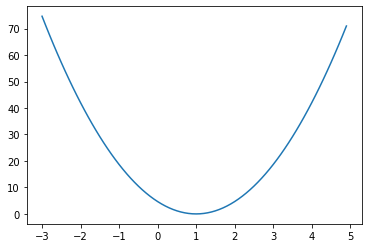

In [3]:
X = [1,2,3]
y = [1,2,3]

W = tf.placeholder(tf.float32)

# Our hypothesis for linear model W * X
hypothesis = W * X

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - y))

# Launch the graph in a session.
sess = tf.Session()

# Initialize global variables in the graph
sess.run(tf.global_variables_initializer())

# Variables for plotting cost function
W_val = []
cost_val = []
for i in range(-30, 50):
    feed_W = i * 0.1
    curr_cost, curr_W = sess.run([cost, W],
                                feed_dict={W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)
    
# Show the cost function
plt.plot(W_val, cost_val)
plt.show()

cost 함수는 이렇게 생겼다! (= convex function)

## Gradient descent algorithm - Tensor flow로 구현

![](lec03.assets/image1.png)

In [7]:
x_data = [1,2,3]
y_data = [1,2,3]

W = tf.Variable(tf.random_normal([1]), name='weight')
X = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

# Our hypothesis for linear model W * X
hypothesis = W * X

# cost/loss function
cost = tf.reduce_sum(tf.square(hypothesis - y))

# Minimize: Gradient Descent using derivate:
# W -= learning_rate * derivative
learning_rate = 0.1  # ⍺
gradient = tf.reduce_mean((W * X - y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)

# Launch the graph in a session
sess = tf.Session()

# Initialize global variables in the graph
sess.run(tf.global_variables_initializer())

for step in range(21):
    _, _cost, _W = sess.run([update, cost, W], feed_dict={X: x_data,
                                                   y: y_data})
    print(f'{step} step\n  cost: {_cost}\n  W: {_W}\n')

0 step
  cost: 26.7491397857666
  W: [0.26279274]

1 step
  cost: 7.608643531799316
  W: [0.60682285]

2 step
  cost: 2.164235830307007
  W: [0.7903055]

3 step
  cost: 0.6156051158905029
  W: [0.888163]

4 step
  cost: 0.17510537803173065
  W: [0.9403536]

5 step
  cost: 0.04980776831507683
  W: [0.9681886]

6 step
  cost: 0.014167515560984612
  W: [0.9830339]

7 step
  cost: 0.00402988214045763
  W: [0.9909514]

8 step
  cost: 0.00114628195296973
  W: [0.9951741]

9 step
  cost: 0.0003260507364757359
  W: [0.9974262]

10 step
  cost: 9.274231706513092e-05
  W: [0.9986273]

11 step
  cost: 2.6379098926554434e-05
  W: [0.9992679]

12 step
  cost: 7.503812867071247e-06
  W: [0.99960953]

13 step
  cost: 2.134396027031471e-06
  W: [0.99979174]

14 step
  cost: 6.070542326597206e-07
  W: [0.9998889]

15 step
  cost: 1.7281445252592675e-07
  W: [0.99994075]

16 step
  cost: 4.918531715247809e-08
  W: [0.9999684]

17 step
  cost: 1.3994011283102736e-08
  W: [0.9999832]

18 step
  cost: 3.96

- assign : tensorflow 에서는 바로 assign 할 수 없어 W.assign(descent) 같은 방법으로 assign 한다

### Minimize: Gradient Descent Magic (Lec 02.)

optimizer = tf.train.<u>**GradientDescentOptimizer**</u>(learning_rate=0.1)  
train = optimizer.minimize(cost)

## Using GradientDescentOptimizer
W 의 Initial Value 를 1000을 주고 실시

In [11]:
# tf graph input
X = [1,2,3]
y = [1,2,3]

# Set wrong model weights
W = tf.Variable(1000.0)  
# ↪ W 에 말도 안되는 값 넣어보고 Gradient Descent Algorithm 적용

# Linear model
hypothesis = W * X

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - y))

# Minimize: Gradient Descent Magic
optimizer = \
    tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

# Launch the graph in a session
sess = tf.Session()

# Initializes global variables in the graph
sess.run(tf.global_variables_initializer())

for step in range(10):
    _W, _ = sess.run([W, train])
    print(f'{step} step\n  W: {_W}\n')

0 step
  W: 67.5999755859375

1 step
  W: 5.439994812011719

2 step
  W: 1.295999526977539

3 step
  W: 1.0197333097457886

4 step
  W: 1.0013155937194824

5 step
  W: 1.0000877380371094

6 step
  W: 1.000005841255188

7 step
  W: 1.0000003576278687

8 step
  W: 1.0

9 step
  W: 1.0



## Optional:  
- **compute_gradient**
- **apply_gradient****

In [25]:
# tf graph input
X = [1,2,3]
y = [1,2,3]

# Set wrong model weights
W = tf.Variable(1000.0)

# Linear model
hypothesis = W * X

# Manual gradient
gradient = tf.reduce_mean((W * X - y) * X) * 2

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - y))

# Minimize: Gradient Descent Magic
optimizer = \
    tf.train.GradientDescentOptimizer(learning_rate=0.1)

# <--- optimizer 바로 minimize 안하고, gradient 를 손 대보기
# Get gradients
gvs = optimizer.compute_gradients(cost, [W])

# something to do ...

# Apply gradients
apply_gradients = optimizer.apply_gradients(gvs)
# optimizer 바로 minimize 안하고, gradient 를 손 대보기 --->

# Launch the graph in a session
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(100):
    _gradient, _W, _gvs = sess.run([gradient, W, gvs])
    print(f'{step} step\n  gradient: {_gradient}\n  W: {_W}\n  gvs: {_gvs}\n')
    sess.run(apply_gradients)

0 step
  gradient: 9324.0
  W: 1000.0
  gvs: [(9324.0, 1000.0)]

1 step
  gradient: 621.5997924804688
  W: 67.5999755859375
  gvs: [(621.5998, 67.599976)]

2 step
  gradient: 41.4399528503418
  W: 5.439994812011719
  gvs: [(41.439953, 5.439995)]

3 step
  gradient: 2.762662172317505
  W: 1.295999526977539
  gvs: [(2.7626624, 1.2959995)]

4 step
  gradient: 0.18417732417583466
  W: 1.0197333097457886
  gvs: [(0.18417732, 1.0197333)]

5 step
  gradient: 0.012278874404728413
  W: 1.0013155937194824
  gvs: [(0.012278875, 1.0013156)]

6 step
  gradient: 0.0008188883657567203
  W: 1.0000877380371094
  gvs: [(0.00081888837, 1.0000877)]

7 step
  gradient: 5.4756801546318457e-05
  W: 1.000005841255188
  gvs: [(5.47568e-05, 1.0000058)]

8 step
  gradient: 3.0994415283203125e-06
  W: 1.0000003576278687
  gvs: [(3.0994415e-06, 1.0000004)]

9 step
  gradient: 0.0
  W: 1.0
  gvs: [(0.0, 1.0)]

10 step
  gradient: 0.0
  W: 1.0
  gvs: [(0.0, 1.0)]

11 step
  gradient: 0.0
  W: 1.0
  gvs: [(0.0, 1.0)]

- gradient: 우리가 계산한 기울기
- gvs: [GradientDescentOptimizer가 계산한 기울기, W]